In [26]:
# to mount the drive to google colab 
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
# import the required libraries
import numpy as np
import os
import cv2

In [28]:
# below fn returns rectangle for the detected face along with gray img 
def detect_face(test_img):
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY) # converts color img to grayscale img
    # the below line loads haar classifier
    face_haar_cascade = cv2.CascadeClassifier("/content/drive/My Drive/LBPH/face_recognition/haar_cascade/haarcascade_frontalface_default.xml")
    faces = face_haar_cascade.detectMultiScale(gray_img, scaleFactor = 1.32, minNeighbors = 5) # detectMultiScale returns rectangles
    return faces, gray_img

In [29]:
# given a directory below fn returns part of gray_img (face) along with its label
def labels_train_data(directory):
    faces = []
    labels = []
    for path, subdirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.startswith("."):
                print("Skipping system file")
                continue
            id = os.path.basename(path) # fetching subdirectory names
            img_path = os.path.join(path, filename) # fetching img path
            print("img_path:", img_path)
            print("id:", id)
            test_img = cv2.imread(img_path) # loading each img
            if test_img is None:
                print("Image not loaded properly")
                continue
            faces_rect, gray_img = detect_face(test_img) # calling this fn returns faces detected in particular img
            if len(faces_rect) != 1:
                continue # since we are assuming only single person images are being fed to the classifier
            (x, y, w, h) = faces_rect[0]
            roi_gray = gray_img[y : y + w, x : x + h] # cropping region of interest (face area from grayscale image)
            faces.append(roi_gray)
            labels.append(int(id))
    return faces, labels

In [30]:
# below fn trains haar classifier and takes faces, labels returned by pre fn as its args
def train_classifier(faces, labels):
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    face_recognizer.train(faces, np.array(labels))
    return face_recognizer

In [31]:
# below fn draws bounding boxes around detected face in img
def b_boxes(test_img, face):
    (x, y, w, h) = face
    cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness = 3)

In [32]:
# below fn names the person for detected label
def put_name(test_img, text, x, y):
    cv2.putText(test_img, text, (x, y), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 0), 3)

In [33]:
test_img = cv2.imread("/content/drive/My Drive/LBPH/face_recognition/TestImages/three.jpg") # test img path

In [34]:
faces_detected, gray_img = detect_face(test_img)

In [35]:
print("faces detected:", faces_detected)

faces detected: [[ 49 105 210 210]
 [796 131 233 233]
 [431 131 310 310]]


In [36]:
# comment this line when running 2nd time. Since we are saving training data file in directory
# faces, labels = labels_train_data("/content/drive/My Drive/LBPH/face_recognition/trainingImages")

In [37]:
# comment this line when running 2nd time. Since we are saving training data file in directory
# face_recognizer = train_classifier(faces, labels)

In [38]:
# comment this line when running 2nd time. Since we are saving training data file in directory
# face_recognizer.write("/content/drive/My Drive/LBPH/face_recognition/trainingData.yml")

In [39]:
# uncomment below lines for subsequent runs
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read("/content/drive/My Drive/LBPH/face_recognition/trainingData.yml")

In [40]:
name = {0:"Priyanka Chopra", 1:"Kangana Ranaut", 2:"Mahesh Babu"} # creating dict containing names

In [41]:
for face in faces_detected:
    (x, y, w, h) = face
    roi_gray = gray_img[y:y+h, x:x+w]
    label, confidence = face_recognizer.predict(roi_gray) # predicting the label of given image
    print("Confidence:", confidence)
    print("Label:", label)
    b_boxes(test_img, face)
    predicted_name = name[label]
    if confidence>100: # if this is true then it doesn't print predicted face text on screen
        continue
    put_name(test_img, predicted_name, x, y)

Confidence: 47.4365569500053
Label: 0
Confidence: 24.835801804137066
Label: 2
Confidence: 61.74416283464935
Label: 1


In [42]:
# import this if working in google colab 
from google.colab.patches import cv2_imshow

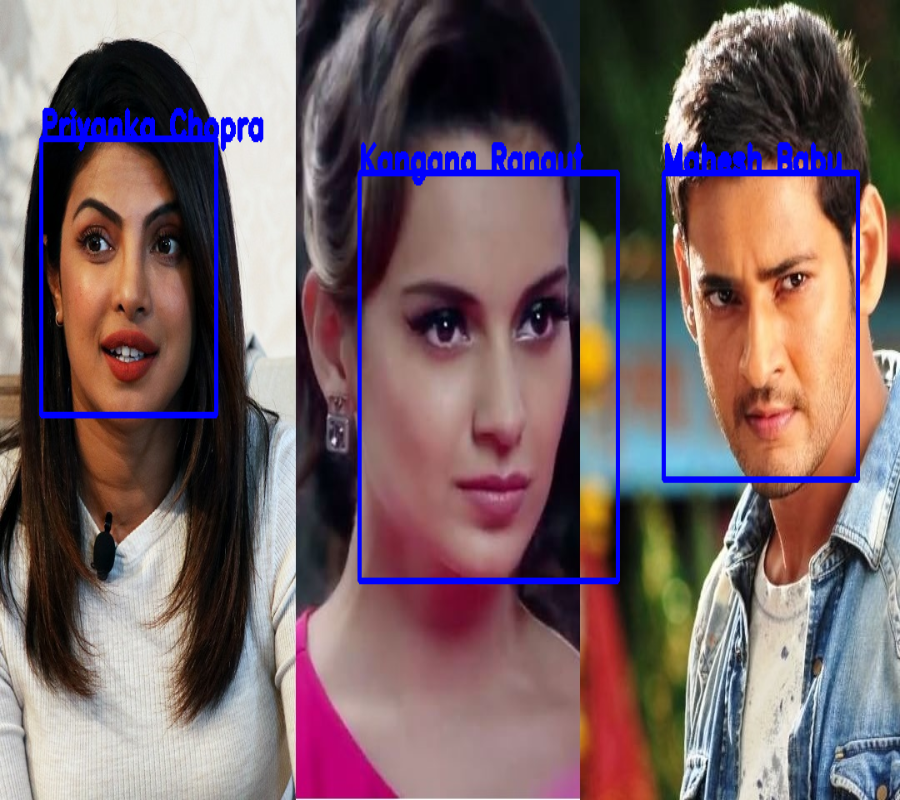

In [43]:
resized_img = cv2.resize(test_img, (900, 800))
cv2_imshow(resized_img) # cv2_imshow() is used in google colab instead of cv2.imshow() and it takes only one value
cv2.waitKey(0) # waits indefinitely until a key is pressed
cv2.destroyAllWindows()